Q1.	An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import pylab
import scipy
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning)

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Multiple Regression\Assignments/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# checking dimensions of the dataset
data.shape

(50, 5)

In [4]:
# checking for null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no null values

In [5]:
# checking for duplicate value
data.duplicated().sum()

0

There are no duplicate values

In [6]:
# Descriptive statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [7]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


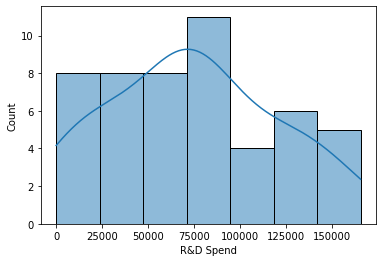

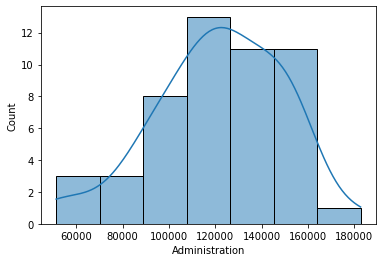

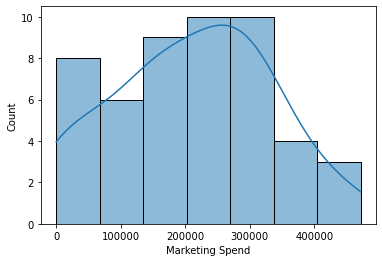

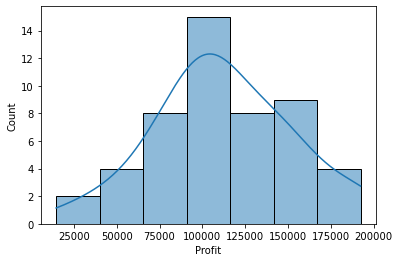

In [8]:
# Plotting histogram to check distribution of the features
for col in data.columns:
    if col !='State':
        sns.histplot(data[col],kde=1);
        plt.show()

The data for all the features is normally distributed

<AxesSubplot:xlabel='State', ylabel='count'>

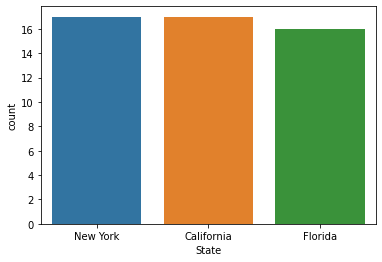

In [9]:
# Countplot for State feature
sns.countplot(x = data.State)

Dataset contains data from all three states

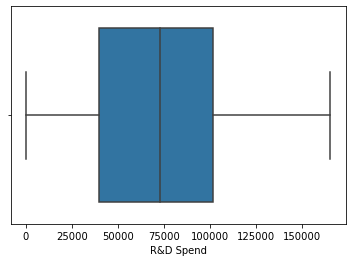

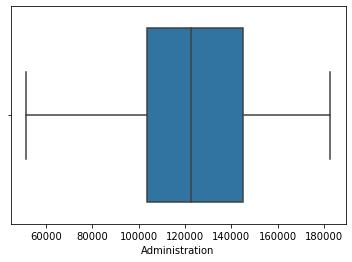

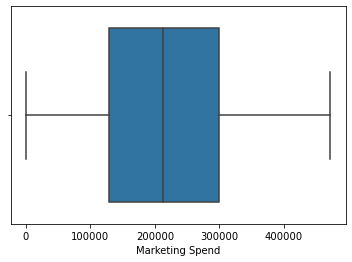

In [10]:
# Checking for outliers
for col in ['R&D Spend','Administration', 'Marketing Spend']:
    sns.boxplot(x = data[col]);
    plt.show()

There are no outliers in the features 

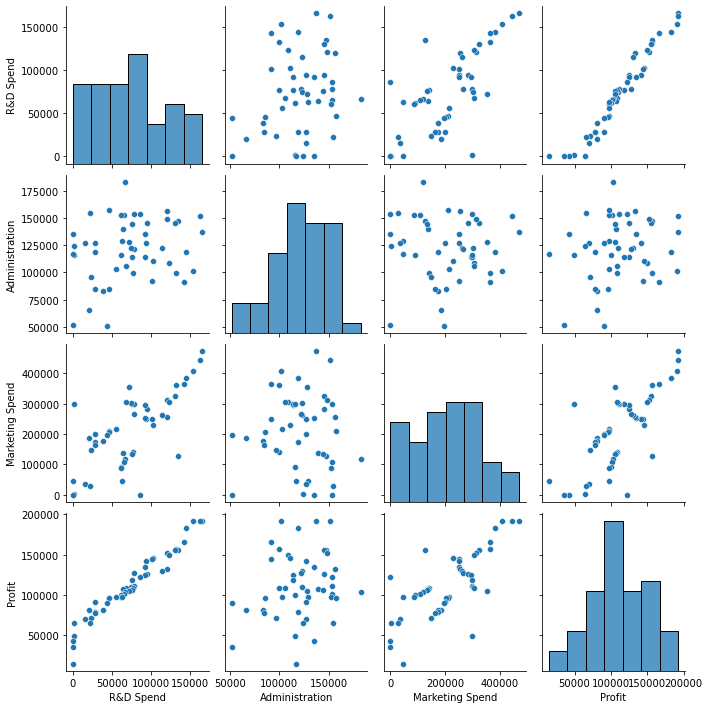

In [11]:
# Relationship between features
sns.pairplot(data)

<AxesSubplot:>

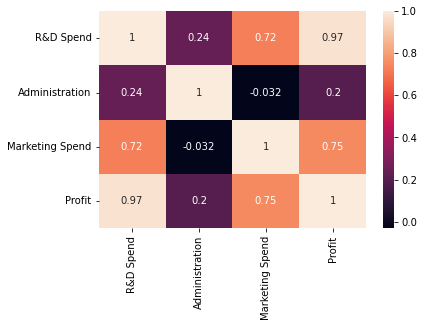

In [12]:
# Correlation between the features
sns.heatmap(data.corr(),annot=True)

There is high positive corrleation between R&D Spend and Profit and good corrleation between Marketing Spend and Profit.
Profit is not that much related to Administration.
Also, all the independent features have low correlation with each other 

In [13]:
# Renaming columns 
data.rename(columns={'R&D Spend':'RandD_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)

In [14]:
# Checking for multi-collinearity 
import statsmodels.formula.api as smf

# Checking variance inflation factor
rsq_RandD = smf.ols('RandD_Spend ~ Administration + Marketing_Spend',data = data).fit().rsquared
vif_RandD = 1/(1 - rsq_RandD);

rsq_admin = smf.ols('Administration ~ RandD_Spend + Marketing_Spend',data = data).fit().rsquared
vif_admin = 1/(1 - rsq_admin);

rsq_mark = smf.ols('Marketing_Spend ~ RandD_Spend + Administration',data = data).fit().rsquared
vif_mark = 1/(1 - rsq_mark);

VIF_table = pd.DataFrame([[vif_RandD,vif_admin,vif_mark]], columns = ['R&D Spend','Administration','Marketing Spend'],index = ['VIF'])
VIF_table.T

,VIF
R&D Spend,2.468903
Administration,1.175091
Marketing Spend,2.326773


The VIF for the feature are less than 10, hence no collinearity

In [15]:
# Converting categorical data to numerical data

data = pd.get_dummies(columns=['State'], data=data, drop_first=True)

In [16]:
data.rename(columns = {'State_New York':'State_New_York'},inplace=True)

# MODEL 1

In [17]:
# importing statsmodels for Simple Linear Regression

import statsmodels.formula.api as smf

model = smf.ols('Profit ~ RandD_Spend + Administration + Marketing_Spend + \
                State_Florida + State_New_York', data = data).fit()    # fiting the data to OLS model

In [18]:
# Summary of the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        00:28:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
RandD_Spend         0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
State_Florida     198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_New_York    -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We get an R-squared value of 0.831

In [19]:
# Predicting the Weight based on the model 
pred1 = model.predict(data)
pred1

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133818
5     163473.807120
6     158099.292788
7     160155.644650
8     151634.743327
9     154829.662528
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301169
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236604
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746175
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


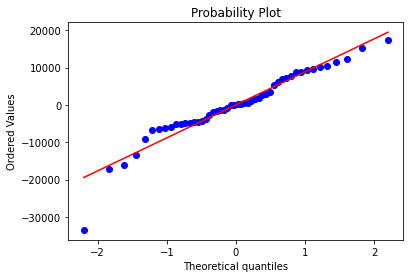

In [21]:
# Q-Q plot
from scipy import stats

res = model.resid
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

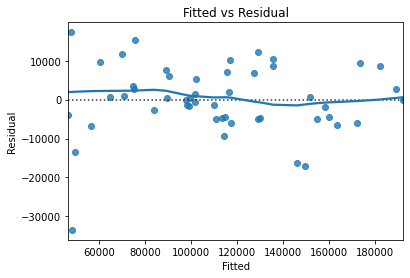

In [22]:
# Residual vs fitted plot

sns.residplot(x = pred1, y = data.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

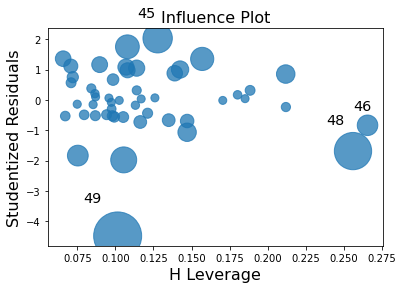

In [26]:
# Influence plot to check influence of each case
import statsmodels.api as sm
sm.graphics.influence_plot(model)
plt.show()

In [27]:
# Checking p-values for the model
model.pvalues

Intercept          4.444178e-09
RandD_Spend        2.578772e-21
Administration     6.077373e-01
Marketing_Spend    1.226769e-01
State_Florida      9.532429e-01
State_New_York     9.897941e-01
dtype: float64

p-values for Administration, Marketing_Spend, State_Florida, State New York are very high, hence are insignificant to predict the Profit of the company.

In [28]:
# Splitting into independent and dependent features

x = pd.DataFrame(data.RandD_Spend)
y = pd.DataFrame(data.Profit)

In [29]:
# Using train test split

from sklearn import model_selection

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y, test_size = 0.2)

In [30]:
# Shape of train test data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40, 1), (10, 1), (40, 1), (10, 1))

In [31]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)

In [32]:
# Using the best model (Model_4)
# Fitting the train data to the model

mms_X_train = sm.add_constant(mms_X_train)
mms_X_test = sm.add_constant(mms_X_test)

best_model = sm.OLS(Y_train, mms_X_train).fit()

In [33]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     860.9
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.03e-27
Time:                        00:31:23   Log-Likelihood:                -415.00
No. Observations:                  40   AIC:                             834.0
Df Residuals:                      38   BIC:                             837.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.311e+04   2509.210     21.168      0.000     4.8e+04    5.82e+04
x1          1.345e+05   4583.432     29.341      0.000    1.25e+05    1.44e+05
==============================================================================
Omnibus:                        0.109   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.323
Skew:                          -0.007   Prob(JB):                        0.851
Kurtosis:                       2.560   Cond. No.                         4.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Predicting for test data
best_pred_test = best_model.predict(mms_X_test)
best_pred_test

array([ 53114.73917397, 129455.51591663, 108039.94507717, 159088.13627685,
        53555.59645949,  76501.0612303 ,  71152.2232719 , 115775.77249907,
        90873.74885459, 123401.15990474])

In [35]:
# RMSE Error calculation for test data

res_test = np.array(Y_test) - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r_sqared_test = best_model.rsquared  
print(f'\nR-Squared value for test data : {r_sqared_test}')
print(f'\nRMSE for test data : {rmse_test}')


R-Squared value for test data : 0.9577249142472828

RMSE for test data : 54209.79259977863


In [36]:
# Predicting for train data
best_pred_train = best_model.predict(mms_X_train)

# RMSE Error calculation for train data

res_train = np.array(Y_train) - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r_sqared_train = best_model.rsquared  
print(f'\nR-Squared value for train data : {r_sqared_train}')
print(f'\nRMSE for train data : {rmse_train}')


R-Squared value for train data : 0.9577249142472828

RMSE for train data : 52766.092094537205


The train and test data have the same rsquared value and very low RMSE values.